In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

### Columns to have - 
PIN | case_assigned_to | start_time | end_time | time_spent | steps_EDA_1 | time_spent_EDA1 | .... | solution_point

In [2]:
df2 = pd.read_excel('../data/Merged_onehot.xlsx')

In [3]:
df2 = df2.drop('Unnamed: 0', 1)

In [4]:
# Creating time_diff column for adding in the new dataframe

df2['diff_timestamp'] = df2.groupby(['PIN', 'case_assigned_to'])['timestamp'].transform(pd.Series.diff).fillna(pd.Timedelta(seconds=0))
df2['diff_seconds']  = df2['diff_timestamp'].apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')

In [5]:
# df2.groupby(['PIN','case_assigned_to'])['timestamp'].tail(1)

In [6]:
start_time = df2.groupby(['PIN','case_assigned_to'], sort = False)['timestamp'].head(1).tolist()

In [7]:
stop_time = df2.groupby(['PIN','case_assigned_to'],  sort = False)['timestamp'].tail(1).tolist()

In [8]:
new_df = pd.DataFrame(df2.groupby(['PIN','case_assigned_to'],  sort = False).size().reset_index())

In [9]:
new_df.drop(0,1, inplace = True)

In [10]:
new_df['start_time'] = start_time

In [11]:
new_df['stop_time'] = stop_time

In [12]:
new_df['time_spent'] = new_df['stop_time'] - new_df['start_time']

In [13]:
new_df.head()

,PIN,case_assigned_to,start_time,stop_time,time_spent
0,AEOGCR7,Goettlich,2018-05-08 15:12:22,2018-05-08 15:32:43,0 days 00:20:21
1,AKVVO8S,Goettlich,2018-05-09 07:01:14,2018-05-09 07:23:59,0 days 00:22:45
2,A75J1OO,Goettlich,2018-05-11 07:12:33,2018-05-11 07:38:08,0 days 00:25:35
3,BPDREJD,Goettlich,2018-05-11 14:56:22,2018-05-11 15:10:34,0 days 00:14:12
4,BQLTZM2,Goettlich,2018-05-11 11:00:58,2018-05-11 11:19:16,0 days 00:18:18


In [14]:
new_df.sample()

,PIN,case_assigned_to,start_time,stop_time,time_spent
263,PMFO45G,Wenninger,2018-05-15 15:32:34,2018-05-15 15:40:03,0 days 00:07:29


In [15]:
# df2[(df2['PIN'] == 'ZJF8JVQ') &  (df2['case_assigned_to'] == 'Freundorf') & (df2['EDA'] == 5) ].count()

In [16]:
# Adding EDA as number of steps column

#EDA-0
new_df['steps_EDA_0'] = df2[df2['EDA']== 0 ].groupby(['PIN','case_assigned_to'], sort = False)['EDA'].count().tolist()

#EDA-1
new_df['steps_EDA_1'] = df2[df2['EDA']== 1 ].groupby(['PIN','case_assigned_to'], sort = False)['EDA'].count().tolist()

# EDA-2
new_df['steps_EDA_2'] = df2[df2['EDA']== 2 ].groupby(['PIN','case_assigned_to'], sort = False)['EDA'].count().tolist()

#EDA-3
EDA_3 = pd.DataFrame(df2[df2['EDA']== 3 ].groupby(['PIN','case_assigned_to'], sort = False)['EDA'].count())
EDA_3.rename(columns= {'EDA':'steps_EDA_3'}, inplace = True)
new_df = pd.merge(new_df, EDA_3,how='left', 
                     left_on=('PIN','case_assigned_to'), right_on=('PIN','case_assigned_to'))


#EDA-4
EDA_4 = pd.DataFrame(df2[df2['EDA']== 4 ].groupby(['PIN','case_assigned_to'], sort = False)['EDA'].count())
EDA_4.rename(columns= {'EDA':'steps_EDA_4'}, inplace = True)
new_df = pd.merge(new_df, EDA_4,how='left', 
                     left_on=('PIN','case_assigned_to'), right_on=('PIN','case_assigned_to'))


#EDA-5
EDA_5 = pd.DataFrame(df2[df2['EDA']== 5 ].groupby(['PIN','case_assigned_to'], sort = False)['EDA'].count())
EDA_5.rename(columns= {'EDA':'steps_EDA_5'}, inplace = True)
new_df = pd.merge(new_df, EDA_5,how='left', 
                     left_on=('PIN','case_assigned_to'), right_on=('PIN','case_assigned_to'))



In [17]:
# EDA_3 = pd.DataFrame(df2[df2['EDA']== 3 ].groupby(['PIN','case_assigned_to'], sort = False)['EDA'].count())

In [18]:
# EDA_3.rename(columns= {'EDA':'steps_EDA_3'}, inplace = True)
# pd.merge(new_df, EDA_3,how='left', 
#                      left_on=('PIN','case_assigned_to'), right_on=('PIN','case_assigned_to'))

In [19]:
# Adding timespent

# Adding EDA as time spend in seconds

#EDA-0
new_df['timespent_EDA_0'] = df2[df2['EDA']== 0].groupby(['PIN','case_assigned_to'], sort = False)['diff_seconds'].sum().tolist()

#EDA-1
new_df['timespent_EDA_1'] = df2[df2['EDA']== 1].groupby(['PIN','case_assigned_to'], sort = False)['diff_seconds'].sum().tolist()

# EDA-2
new_df['timespent_EDA_2'] = df2[df2['EDA']== 2].groupby(['PIN','case_assigned_to'], sort = False)['diff_seconds'].sum().tolist()

#EDA-3
EDA_3 = pd.DataFrame(df2[df2['EDA']== 3].groupby(['PIN','case_assigned_to'], sort = False)['diff_seconds'].sum())
EDA_3.rename(columns= {'diff_seconds':'timespent_EDA_3'}, inplace = True)
new_df = pd.merge(new_df, EDA_3,how='left', 
                     left_on=('PIN','case_assigned_to'), right_on=('PIN','case_assigned_to'))


#EDA-4
EDA_4 = pd.DataFrame(df2[df2['EDA']== 4].groupby(['PIN','case_assigned_to'], sort = False)['diff_seconds'].sum())
EDA_4.rename(columns= {'diff_seconds':'timespent_EDA_4'}, inplace = True)
new_df = pd.merge(new_df, EDA_4,how='left', 
                     left_on=('PIN','case_assigned_to'), right_on=('PIN','case_assigned_to'))


#EDA-5
EDA_5 = pd.DataFrame(df2[df2['EDA']== 5].groupby(['PIN','case_assigned_to'], sort = False)['diff_seconds'].sum())
EDA_5.rename(columns= {'diff_seconds':'timespent_EDA_5'}, inplace = True)
new_df = pd.merge(new_df, EDA_5,how='left', 
                     left_on=('PIN','case_assigned_to'), right_on=('PIN','case_assigned_to'))

    

In [20]:
# Adding solution Points - which we will consider as our labels
new_df['result'] = df2.groupby(['PIN','case_assigned_to'], sort = False)['Solution_points'].min().tolist()

In [21]:
# making all the numerics into int64
new_df.steps_EDA_3.fillna(0, inplace = True)
new_df['steps_EDA_3'] = new_df['steps_EDA_3'].astype('int64')

new_df.steps_EDA_4.fillna(0, inplace = True)
new_df['steps_EDA_4'] = new_df['steps_EDA_4'].astype('int64')

new_df.steps_EDA_5.fillna(0, inplace = True)
new_df['steps_EDA_5'] = new_df['steps_EDA_5'].astype('int64')

new_df.timespent_EDA_3.fillna(0, inplace = True)
new_df['timespent_EDA_3'] = new_df['timespent_EDA_3'].astype('int64')

new_df.timespent_EDA_4.fillna(0, inplace = True)
new_df['timespent_EDA_4'] = new_df['timespent_EDA_4'].astype('int64')

new_df.timespent_EDA_5.fillna(0, inplace = True)
new_df['timespent_EDA_5'] = new_df['timespent_EDA_5'].astype('int64')

In [22]:
# changing the time-spent to seconds
new_df['timespent_seconds'] = new_df['time_spent'].apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 0 to 464
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   PIN                465 non-null    object         
 1   case_assigned_to   465 non-null    object         
 2   start_time         465 non-null    datetime64[ns] 
 3   stop_time          465 non-null    datetime64[ns] 
 4   time_spent         465 non-null    timedelta64[ns]
 5   steps_EDA_0        465 non-null    int64          
 6   steps_EDA_1        465 non-null    int64          
 7   steps_EDA_2        465 non-null    int64          
 8   steps_EDA_3        465 non-null    int64          
 9   steps_EDA_4        465 non-null    int64          
 10  steps_EDA_5        465 non-null    int64          
 11  timespent_EDA_0    465 non-null    int64          
 12  timespent_EDA_1    465 non-null    int64          
 13  timespent_EDA_2    465 non-null    int64          

In [24]:
# new_df.fillna(pd.Timedelta(seconds=0), inplace = True)

In [25]:
# checking if any column as any NAN
new_df.columns[new_df.isna().any()].tolist()
new_df[new_df.isna().any(axis=1)]

,PIN,case_assigned_to,start_time,stop_time,time_spent,steps_EDA_0,steps_EDA_1,steps_EDA_2,steps_EDA_3,steps_EDA_4,steps_EDA_5,timespent_EDA_0,timespent_EDA_1,timespent_EDA_2,timespent_EDA_3,timespent_EDA_4,timespent_EDA_5,result,timespent_seconds


In [26]:
# making 'case_assigned_to' into integer values
names = new_df.case_assigned_to.unique().tolist()
vals = [1, 2, 3, 4, 5]
x = dict(zip(names, vals))
new_df.replace(x, inplace = True)

In [27]:
# saving this dataset as an excel sheet

# determining the name of the file
file_name = 'wide_data.xlsx'
  
# saving the excel
new_df.to_excel(file_name)

### Creating a supervised Learning model

In [150]:
new_df.head()

,PIN,case_assigned_to,start_time,stop_time,time_spent,steps_EDA_0,steps_EDA_1,steps_EDA_2,steps_EDA_3,steps_EDA_4,steps_EDA_5,timespent_EDA_0,timespent_EDA_1,timespent_EDA_2,timespent_EDA_3,timespent_EDA_4,timespent_EDA_5,result,timespent_seconds
0,AEOGCR7,1,2018-05-08 15:12:22,2018-05-08 15:32:43,0 days 00:20:21,25,20,2,16,3,2,580,386,10,134,66,45,1,1221
1,AKVVO8S,1,2018-05-09 07:01:14,2018-05-09 07:23:59,0 days 00:22:45,29,11,3,39,5,1,592,473,12,187,90,11,1,1365
2,A75J1OO,1,2018-05-11 07:12:33,2018-05-11 07:38:08,0 days 00:25:35,43,14,6,20,2,1,639,497,102,138,66,93,1,1535
3,BPDREJD,1,2018-05-11 14:56:22,2018-05-11 15:10:34,0 days 00:14:12,17,10,2,20,2,1,541,153,9,67,22,60,1,852
4,BQLTZM2,1,2018-05-11 11:00:58,2018-05-11 11:19:16,0 days 00:18:18,33,24,2,11,2,2,479,467,8,78,30,36,0,1098


In [28]:
import seaborn as sns

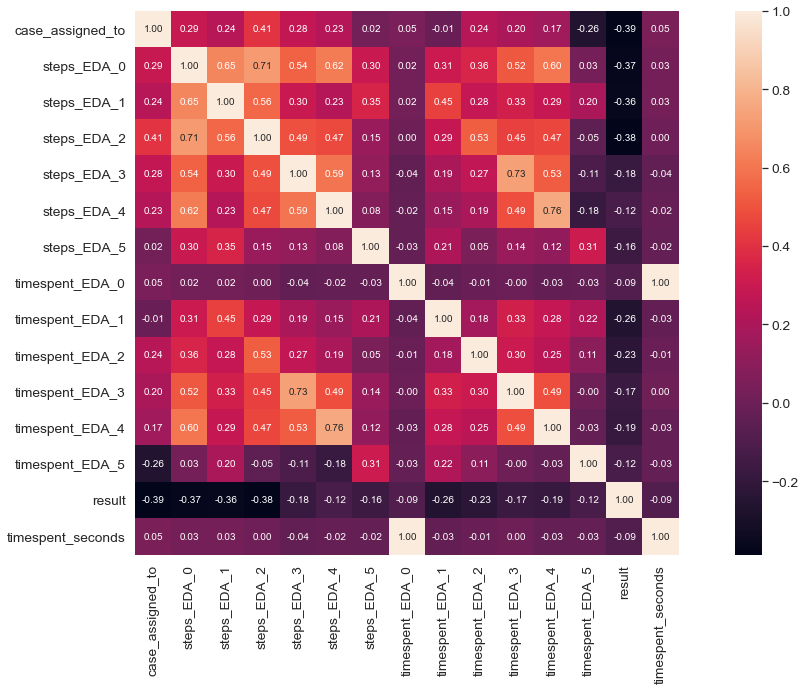

In [29]:
# Finding some correlations

corrmat = new_df.corr()
plt.figure(figsize=(20,10))
# k = 15 #number of variables for heatmap
# cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# cm = np.corrcoef(new_df)
sns.set(font_scale=1.25)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

# Features
X = new_df[['case_assigned_to',
       'steps_EDA_0', 'steps_EDA_1', 'steps_EDA_2', 'steps_EDA_3',
       'steps_EDA_4', 'steps_EDA_5', 'timespent_EDA_0', 'timespent_EDA_1',
       'timespent_EDA_2', 'timespent_EDA_3', 'timespent_EDA_4',
       'timespent_EDA_5', 'timespent_seconds']]

# label
y = new_df[['result']]

feature_names = ['case_assigned_to',
       'steps_EDA_0', 'steps_EDA_1', 'steps_EDA_2', 'steps_EDA_3',
       'steps_EDA_4', 'steps_EDA_5', 'timespent_EDA_0', 'timespent_EDA_1',
       'timespent_EDA_2', 'timespent_EDA_3', 'timespent_EDA_4',
       'timespent_EDA_5', 'timespent_seconds']

In [31]:
X.shape

(465, 14)

In [32]:
y.shape

(465, 1)

In [33]:
y = y.squeeze()

In [34]:
 # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
clf.fit(X_train,y_train)

y_pred_train = clf.predict(X_train)

In [147]:
y_pred=clf.predict(X_test)

In [148]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.7331288343558282


In [140]:
## try kappa score and other metrics too
## 10F KV - and vizualise the distribution of accuracy and kappa value, put seed_value

#### Accuracy with Random Forest Classifier: 82.85%
(when all the features were considered)

In [141]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)


0.34509220940977947

In [142]:
new_df.result.value_counts()

1    307
0    158
Name: result, dtype: int64

## Extracting import features

In [143]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [144]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [145]:
feature_imp = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

ValueError: Length of passed values is 4, index implies 14.

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline


No handles with labels found to put in legend.


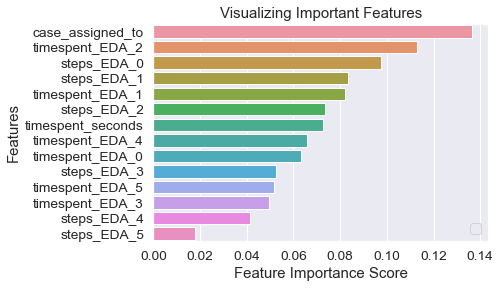

In [45]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Creating a model on Important Feature score

In [46]:
# Split dataset into features and labels
#### Removed unimportant features such as "EDA 3,4,5"
X=new_df[['steps_EDA_1', 'steps_EDA_2', 'timespent_EDA_1','timespent_EDA_2']] 
y=new_df['result']         


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [47]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7239263803680982


In [48]:
cohen_kappa_score(y_test, y_pred)

0.3885716667361314

####  Accuracy: 73% (when only EDA 0,1,2 considered) |    
#### Accuracy: > 70% (when only EDA 1,2 considered)

### Knowing about epistemic data
- iEE = Problem Identification - 1
- EG = Evidence Generation - 2
- cEE = Evidence evaluation - 3
- CHG = - Hypothesis Generation - 4
- DC = Drawing conclusion - 5
- none = 0